In [82]:
import pandas as pd

# For regular expressions
import re
# For handling string
import string
# To interact with Google Sheets.
import gspread
#  For authenticating with Google APIs.
from google.oauth2.credentials import Credentials
from google.oauth2 import service_account
from oauth2client.service_account import ServiceAccountCredentials

In [83]:
scope= ['https://www.googleapis.com/auth/spreadsheets','https://www.googleapis.com/auth/drive']

credentials=ServiceAccountCredentials.from_json_keyfile_name(r'C:\Users\fd92u\Downloads\service_account.json', scope)
client=gspread.authorize(credentials)

In [84]:
from gspread_dataframe import set_with_dataframe
# Open the existing Google Sheet (Use the same name from when you created it)
spreadsheet = client.open("macroeconomics")
# Step 3: Select Sheet2 (either by title or index)
# Option A: By sheet name
worksheet = spreadsheet.worksheet("uk_net_borrowing")  # Use the exact name of the sheet

In [85]:
# Step 4: Get all values from the worksheet
all_values = worksheet.get_all_values()

# Step 4.1: Skip the first row manually
#data_without_first_row = all_values[1:]
# Step 4.1: Use the first row as the header
headers = all_values[0]

# Step 4.2: Use the rest of the rows as data
data = all_values[1:]

# Step 4.3: Create a DataFrame
import pandas as pd
df = pd.DataFrame(data, columns=headers)


In [86]:
df

,Time period,Public sector net borrowing excluding public sector banks\n (£ million),Public sector net borrowing including public sector banks \n (£ million)
0,1997 Apr,"2,908","2,908"
1,1997 May,"2,951","2,951"
2,1997 Jun,"4,959","4,959"
3,1997 Jul,535,535
4,1997 Aug,"2,830","2,830"
...,...,...,...
332,2024 Dec,"18,524","18,524"
333,2025 Jan,"-14,908","-14,908"
334,2025 Feb,"11,801","11,801"
335,2025 Mar,"14,139","14,139"


In [87]:
import sys
import os

# Add parent directory to Python path
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Now import your functions
from functions import data_overview, variables_overview


In [88]:
data_overview(df, "Data_Overview")   

,Data_Overview
Columns,3.0
Rows,337.0
Missing_Values,0.0
Missing_Values %,0.0
Duplicates,0.0
Duplicates %,0.0
Categorical_variables,3.0
Boolean_variables,0.0
Numerical_variables,0.0


In [89]:
variables_overview(df)

,unique,dtype,null,null %,has_non_alphanumeric,has_digits
Time period,337,object,0,0.0,False,True
Public sector net borrowing excluding public sector banks\n (£ million),333,object,0,0.0,True,True
Public sector net borrowing including public sector banks \n (£ million),334,object,0,0.0,True,True


In [90]:
# Step 4.3: Rename columns to 'date' and 'gdp_value'
df.columns = ['date', 'net_borrowing_excluding_public_sector', 'net_borrowing_including _public_sector']

In [91]:
df

,date,net_borrowing_excluding_public_sector,net_borrowing_including _public_sector
0,1997 Apr,"2,908","2,908"
1,1997 May,"2,951","2,951"
2,1997 Jun,"4,959","4,959"
3,1997 Jul,535,535
4,1997 Aug,"2,830","2,830"
...,...,...,...
332,2024 Dec,"18,524","18,524"
333,2025 Jan,"-14,908","-14,908"
334,2025 Feb,"11,801","11,801"
335,2025 Mar,"14,139","14,139"


In [92]:
# Step 1: Convert the 'date' column to datetime
df['month_date'] = pd.to_datetime(df['date'], format='%Y %b')

In [93]:
df

,date,net_borrowing_excluding_public_sector,net_borrowing_including _public_sector,month_date
0,1997 Apr,"2,908","2,908",1997-04-01
1,1997 May,"2,951","2,951",1997-05-01
2,1997 Jun,"4,959","4,959",1997-06-01
3,1997 Jul,535,535,1997-07-01
4,1997 Aug,"2,830","2,830",1997-08-01
...,...,...,...,...
332,2024 Dec,"18,524","18,524",2024-12-01
333,2025 Jan,"-14,908","-14,908",2025-01-01
334,2025 Feb,"11,801","11,801",2025-02-01
335,2025 Mar,"14,139","14,139",2025-03-01


In [94]:
# Step 1: Convert 'month_date' to datetime and set it as index
#df['month_date'] = pd.to_datetime(df['month_date'])
df.set_index('month_date', inplace=True)


In [95]:
variables_overview(df)

,unique,dtype,null,null %,has_non_alphanumeric,has_digits
date,337,object,0,0.0,False,True
net_borrowing_excluding_public_sector,333,object,0,0.0,True,True
net_borrowing_including _public_sector,334,object,0,0.0,True,True


In [96]:
df['net_borrowing_excluding_public_sector'] = (
    df['net_borrowing_excluding_public_sector']
    .astype(str)
    .str.replace(',', '', regex=False)
    .astype(float)
    .div(1000)  # Convert from millions to billions
    .round(2)   # Round to 2 decimal places
)


In [97]:
df

,date,net_borrowing_excluding_public_sector,net_borrowing_including _public_sector
month_date,,,
1997-04-01,1997 Apr,2.91,"2,908"
1997-05-01,1997 May,2.95,"2,951"
1997-06-01,1997 Jun,4.96,"4,959"
1997-07-01,1997 Jul,0.54,535
1997-08-01,1997 Aug,2.83,"2,830"
...,...,...,...
2024-12-01,2024 Dec,18.52,"18,524"
2025-01-01,2025 Jan,-14.91,"-14,908"
2025-02-01,2025 Feb,11.80,"11,801"


In [98]:
df

,date,net_borrowing_excluding_public_sector,net_borrowing_including _public_sector
month_date,,,
1997-04-01,1997 Apr,2.91,"2,908"
1997-05-01,1997 May,2.95,"2,951"
1997-06-01,1997 Jun,4.96,"4,959"
1997-07-01,1997 Jul,0.54,535
1997-08-01,1997 Aug,2.83,"2,830"
...,...,...,...
2024-12-01,2024 Dec,18.52,"18,524"
2025-01-01,2025 Jan,-14.91,"-14,908"
2025-02-01,2025 Feb,11.80,"11,801"


In [114]:
# Assuming df is your original DataFrame and index is datetime
df_april = df[(df.index.month == 4) & (df.index.year >= 2015)].copy()
df_april['year'] = df_april.index.year  # Now safe, no warning


In [120]:
df_april

,date,net_borrowing_excluding_public_sector,net_borrowing_including _public_sector,year,net_borrowing_billion
month_date,,,,,
2015-04-01,2015 Apr,12.10,"11,496",2015,0.01210
2016-04-01,2016 Apr,12.29,"11,571",2016,0.01229
2017-04-01,2017 Apr,12.69,"11,082",2017,0.01269
2018-04-01,2018 Apr,10.17,"9,522",2018,0.01017
2019-04-01,2019 Apr,11.40,"11,525",2019,0.01140
2020-04-01,2020 Apr,49.32,"48,481",2020,0.04932
2021-04-01,2021 Apr,23.69,"22,924",2021,0.02369
2022-04-01,2022 Apr,13.57,"12,721",2022,0.01357
2023-04-01,2023 Apr,19.97,"19,045",2023,0.01997


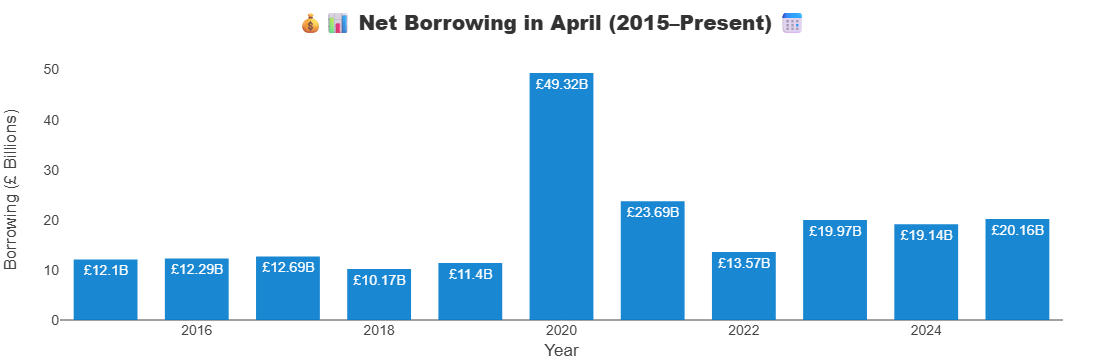

In [122]:
import pandas as pd
import plotly.express as px

# Step 1: Make a copy to avoid SettingWithCopyWarning
df_april = df_april.copy()

# Step 2: Convert net borrowing to billions (no rounding)
df_april['net_borrowing_billion'] = df_april['net_borrowing_excluding_public_sector']

# Step 3: Create the Plotly bar chart
fig = px.bar(
    df_april,
    x='year',
    y='net_borrowing_billion',
    text='net_borrowing_billion',
    title='💰📊 Net Borrowing in April (2015–Present) 📅',
    color_discrete_sequence=['#007acc']
)

# Step 4: Style the numbers on the bars
fig.update_traces(
    texttemplate='£%{text}B',
    textposition='inside',
    marker_line_width=0,
    marker_opacity=0.9
)

# Step 5: Remove gridlines and apply final styling
fig.update_layout(
    font=dict(size=14, family='Arial'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis_title='Year',
    yaxis_title='Borrowing (£ Billions)',
    title_font=dict(size=20, family='Arial Black', color='#333'),
    uniformtext_minsize=12,
    uniformtext_mode='show',
    bargap=0.3,
    margin=dict(t=60, b=40, l=60, r=40),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.show()


In [131]:
df_brexit

,date,net_borrowing_excluding_public_sector,net_borrowing_including _public_sector,monthly_pct_change,prev,manual_pct_change
month_date,,,,,,
2023-01-01,2023 Jan,-8.72,"-9,645",NaN,NaN,NaN
2023-02-01,2023 Feb,10.80,"9,873",-223.853211,-8.72,-223.853211
2023-03-01,2023 Mar,17.46,"16,536",61.666667,10.80,61.666667
2023-04-01,2023 Apr,19.97,"19,045",14.375716,17.46,14.375716
2023-05-01,2023 May,15.36,"14,829",-23.084627,19.97,-23.084627
2023-06-01,2023 Jun,19.06,"18,139",24.088542,15.36,24.088542
2023-07-01,2023 Jul,2.14,"1,163",-88.772298,19.06,-88.772298
2023-08-01,2023 Aug,11.32,"10,335",428.971963,2.14,428.971963
2023-09-01,2023 Sep,15.30,"14,513",35.159011,11.32,35.159011


In [135]:
df_april

,date,net_borrowing_excluding_public_sector,net_borrowing_including _public_sector,year,net_borrowing_billion
month_date,,,,,
2015-04-01,2015 Apr,12.10,"11,496",2015,12.10
2016-04-01,2016 Apr,12.29,"11,571",2016,12.29
2017-04-01,2017 Apr,12.69,"11,082",2017,12.69
2018-04-01,2018 Apr,10.17,"9,522",2018,10.17
2019-04-01,2019 Apr,11.40,"11,525",2019,11.40
2020-04-01,2020 Apr,49.32,"48,481",2020,49.32
2021-04-01,2021 Apr,23.69,"22,924",2021,23.69
2022-04-01,2022 Apr,13.57,"12,721",2022,13.57
2023-04-01,2023 Apr,19.97,"19,045",2023,19.97


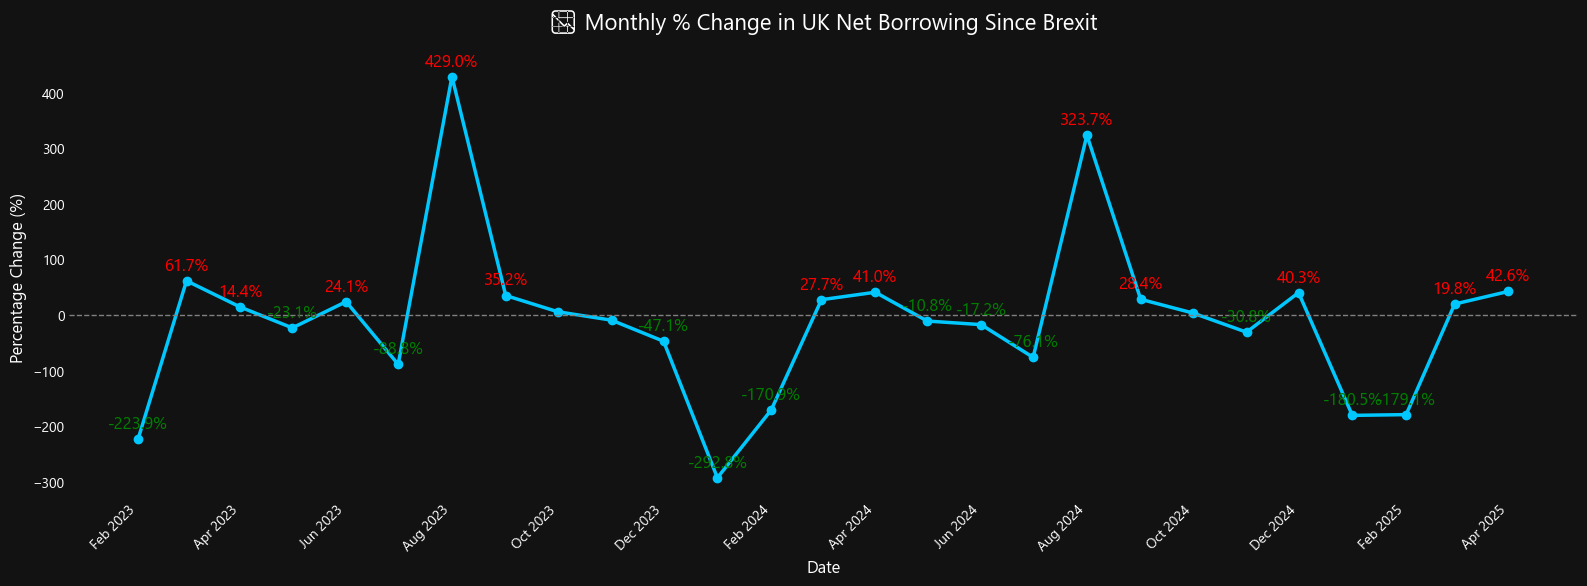

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Filter for dates since Brexit (custom start)
brexit_start = pd.to_datetime('2023-01-01')
df_brexit = df[df.index >= brexit_start].copy()

# Calculate % change
df_brexit['monthly_pct_change'] = df_brexit['net_borrowing_excluding_public_sector'].pct_change() * 100

df_brexit['prev'] = df_brexit['net_borrowing_excluding_public_sector'].shift(1)
df_brexit['manual_pct_change'] = ((df_brexit['net_borrowing_excluding_public_sector'] - df_brexit['prev']) / df_brexit['prev']) * 100

# Show the rows with the biggest changes
#print(df_brexit[['net_borrowing_excluding_public_sector', 'prev', 'monthly_pct_change', 'manual_pct_change']].sort_values(by='manual_pct_change', ascending=False).head(5))




# Plot setup (pure matplotlib styling)
fig, ax = plt.subplots(figsize=(16, 6))

# Dark background styling
fig.patch.set_facecolor('#121212')       # Full figure background
ax.set_facecolor('#121212')              # Plot area background
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

# Plot line
ax.plot(df_brexit.index, df_brexit['monthly_pct_change'],
        marker='o', color='#00c8ff', linewidth=2.5, label='Monthly % Change')

# Horizontal line at 0
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45, ha='right', fontsize=10, color='white')

# Y-axis formatting
ax.tick_params(axis='y', labelsize=10, colors='white')

# Annotate large changes
for date, change in zip(df_brexit.index, df_brexit['monthly_pct_change']):
    if pd.notna(change) and abs(change) > 10:
        ax.annotate(f"{change:.1f}%",
                    xy=(date, change),
                    xytext=(0, 8),
                    textcoords="offset points",
                    ha='center',
                    fontsize=12,
                    fontweight='bold',
                    color='green' if change < 0 else 'red')

# Titles and labels
ax.set_title('📉 Monthly % Change in UK Net Borrowing Since Brexit',
             fontsize=16, fontweight='bold', color='white', pad=20)
ax.set_xlabel('Date', fontsize=12, color='white')
ax.set_ylabel('Percentage Change (%)', fontsize=12, color='white')

# Remove grid if preferred or customize
ax.grid(False)

# Legend (optional)
# ax.legend(facecolor='#121212', edgecolor='white', fontsize=10, labelcolor='white')

# Final layout
plt.tight_layout()
plt.show()
